In [1]:
import sys

sys.path.append("../")

In [2]:
import os
import torch
import numpy as np
import segmentation_models_pytorch as smp

from scripts.plotting import show_images
from scripts.preprocessing import RoadDataset, split_data
from torch.utils.data import DataLoader
from torchvision.transforms import v2

import matplotlib
import matplotlib.pyplot as plt

import albumentations as A

In [3]:
ROOT_PATH = os.path.normpath(os.getcwd() + os.sep + os.pardir)
train_directory = os.path.join(ROOT_PATH, 'data', 'raw', 'training')
image_path_train, image_path_test, mask_path_train, mask_path_test = split_data(train_directory, 0.2)

In [8]:
transform = A.Compose([
    #A.RandomCrop(width=256, height=256),
    #A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
])

# Get train and val dataset instances
train_dataset = RoadDataset(image_path_train, mask_path_train, transform)
valid_dataset = RoadDataset(image_path_test, mask_path_test, transform)

n_cpu = os.cpu_count()

# Get train and val data loaders
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=n_cpu, persistent_workers=True)
valid_loader = DataLoader(valid_dataset, batch_size=4, shuffle=False, num_workers=n_cpu, persistent_workers=True)

In [9]:
for i in range(5):
    img, mask = train_dataset[i]
    show_images(axis=False, satellite=img.transpose(1, 2, 0), ground_truth=mask.squeeze())

ValueError: Height and Width of image, mask or masks should be equal. You can disable shapes check by setting a parameter is_check_shapes=False of Compose class (do it only if you are sure about your data consistency).

TypeError: Invalid shape (400, 3, 400) for image data

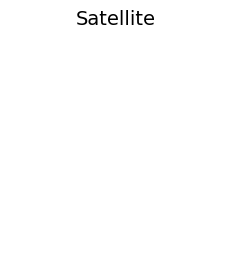

In [15]:
import cv2

image = cv2.imread("../data/raw/training/images/satImage_001.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

mask = cv2.imread("../data/raw/training/groundtruth/satImage_001.png")


transform = A.Compose([
    #A.RandomCrop(width=256, height=256),
    #A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
])

transformed = transform(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']

show_images(axis=False, satellite=transformed_image.transpose(1, 2, 0), ground_truth=transformed_mask.squeeze())